<b><center>TULASI RAMARAO IS620 ( Web Analytics)</center></b>
<hr>
<b>Week 6 Project: </b>
Here is a dataset that shows a simple 2-node network: the attendance of 18 Southern Women at 14 social events:
Identify a large 2-node network dataset—you can start with a dataset in a repository. Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups. Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis. What can you infer about each of the distinct groups? You may work in a small group on the project.
Your code and analysis should be delivered in an IPython Notebook by end of day Sunday October 11th. You should make a presentation that includes your analysis and any relevant visualizations in our meetup on Thursday October 15th.




Dataset is chosen from 
http://analyticsmadeskeezy.com
    Its a drug deal network that where the dealer has 100 customers who buy drug from the dealer regularly. But he needs to make informed decisions on who to sell and not to sell, as he seemed to be left with more 'stuff' and less cash. The dealer wants to retarget who he tries to sell to, not just to anyone with flashing headlights in an empty parking lot. 

The data is in rows and columns where a '1' in the box indicates that the customer took up on the durg offer. This dataset can be analyzed to detect communities in it, patterns and even to detect customer types.  <br> 
The demonstrated graph is a bipartite graph containing two kinds of nodes, namely the customers and the deals. Each row has an identifier for a deal and deal attributes are used to annotate the deal nodes.

In [56]:
%pylab inline
import sys
sys.path.append('/Users/tulasiramarao/anaconda/lib/python2.7/site-packages/')
import networkx as nx
import csv as csv
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [57]:
from networkx.algorithms import bipartite as bi
print("Loaded the necessary libraries")

Loaded the necessary libraries


Create necessary methods to create commnities. <br>
First load the csv dataset file downloaded from the dataset @analyticsmadeskeezy.com

In [58]:
def getRows():
    reader=csv.DictReader(open("inventory.csv","rU"))
    rows = list(reader)
    totalrows = len(rows)
    countA = 0
    n = 0
    for i, row in enumerate(rows):
        #print("Row %d/%d" % (i+1, totalrows))
        strnum = str(i)
        #strnum = strnum + 1
        dealID='deal'+strnum
        d[n] = dealID
        n = n +1
    return(rows,d)


Now create the method to load rows from the reader. 

In [59]:
import csv
import networkx as nx
import urllib
 
# A directed graph object
DG=nx.DiGraph()

def Drug_graph(rows,d, create_using=None, **kwds):    
    nCustomer=100
    nDealID=100
    DG=nx.generators.empty_graph(nCustomer+nDealID,create_using=create_using,**kwds)
    DG.clear()
    DG.name="Drug Dealer network"
    
    # deal is represented by each row
    n=0
    # counter for deal node ID 
    count=1
    totalrows = len(rows)
    #print("totalrows=",totalrows)
    n=0
    i=0
    
    for i, row in enumerate(rows):
        #print("row======",row)
        #print("i=",i)
        dealID=d[i]
        #print("dealID=",dealID)
        
    return(DG,rows,d)
  

Now fill the graph drawing edges between the customers and the drug dealers.
The deals have offer date, product, origin and ready for use( meaning no prep required - all ready to use). The Minimum Qty and discounts are also plotted for weights.

In [60]:
def Fill_Graph(DG,rows,d, create_using=None, **kwds):   
    
    # columns to annotate nodes ( str values )
    nodeColsStr=['Offer date', 'Product', 'Origin', 'Ready for use']
    # columns to annotate nodes ( int values )
    nodeColsInt=['Minimum Qty kg', 'Discount']
    
    # customers
    customerCols=['Smith', 'Johnson', 'Williams', 'Brown', 'Jones', 'Miller', 'Davis', 'Garcia', 
              'Rodriguez', 'Wilson', 'Martinez', 'Anderson', 'Taylor', 'Thomas', 'Hernandez', 'Moore', 
              'Martin', 'Jackson', 'Thompson', 'White' ,'Lopez', 'Lee', 'Gonzalez','Harris', 'Clark', 
              'Lewis', 'Robinson', 'Walker', 'Perez', 'Hall', 'Young', 'Allen', 'Sanchez', 'Wright', 
              'King', 'Scott','Green','Baker', 'Adams', 'Nelson','Hill', 'Ramirez', 'Campbell', 
              'Mitchell', 'Roberts', 'Carter', 'Phillips', 'Evans', 'Turner', 'Torres', 
              'Parker', 'Collins', 'Edwards', 'Stewart', 'Flores', 'Morris', 'Nguyen', 'Murphy', 
              'Rivera', 'Cook', 'Rogers', 'Morgan', 'Peterson', 'Cooper', 'Reed', 'Bailey', 'Bell', 
              'Gomez', 'Kelly', 'Howard', 'Ward', 'Cox', 'Diaz', 'Richardson', 'Wood', 'Watson', 
              'Brooks', 'Bennett', 'Gray', 'James', 'Reyes', 'Cruz', 'Hughes', 'Price', 'Myers', 
              'Long', 'Foster', 'Sanders', 'Ross', 'Morales', 'Powell', 'Sullivan', 'Russell', 
              'Ortiz', 'Jenkins', 'Gutierrez', 'Perry', 'Butler', 'Barnes', 'Fisher']
 
    # Customer node creation 
    print(len(customerCols))
    c={}
    n=0
    for customer in customerCols:
        #print(customer)
        DG.add_node(customer,typ="customer")
        c[n] = customer
        n+=1
 
    # Iterate through the rows and create the deal nodes and their annotations
    # Then create edges between the customers and the dealers(dealIDs)
    for i, row in enumerate(rows):
        #print("i==",i)
        #print("row=",row)
        dealID = d[i]
        #print("**** dealID =========", dealID)
        DG.add_node(dealID,typ='deal')
        for deal in nodeColsStr:
            DG.node[dealID][deal]=row[deal]
        for deal in nodeColsInt:
            DG.node[dealID][deal]=int(row[deal])
        for customer in customerCols:
            if str(row[customer])=='1':
                DG.add_edge(dealID,customer)
    return (DG,list(c.values()),list(d.values()))

Now create a method to project the graph.<br>
Projection is a unipartitie projection of a bipartite graph onto a set of nodes given.<br>
The nodes ( still keeping their name) connect if they share a common node.

In [61]:
def project(B,pv,result=False,**kwds):
    if result:
        DG=result
    else:
        DG=nx.Graph(**kwds)
    for v in pv:
        DG.add_node(v)
        for cv in B.neighbors(v):
            DG.add_edges_from([(v,u) for u in B.neighbors(cv)])
    return DG


In [62]:
from networkx.algorithms import bipartite as bi


Now the main method where the above methods are called <br>

In [63]:
if __name__ == "__main__":
 
    #Define a variable to act as a deal node ID counter
    #g_dcid=0
    d ={}
    rows,d = getRows()
  
    totalrows = len(rows)
    #for i, row in enumerate(rows):
    #    print("row======",row)
    #    print("Row %d/%d" % (i+1, totalrows))

    # return graph and rows and dealIDs
    (DG,rows,d)=Drug_graph(rows,d)
    
    # return graph, customer and dealIDs
    (DG,customer,dealID) = Fill_Graph(DG,rows,d)
    
    # write the graph to a graphml object to visualize the data in Gephi
    nx.write_graphml(DG,"inventoryDD1.graphml")
   
  

100


In [74]:
    # project bipartite graph onto customer nodes
    C=project(DG,customer)
    # project bipartite graph onto dealer nodes
    D=project(DG,dealID)

    #print("Degree distributions of projected graphs")
    #print('') 
    #print("Customers")
    #for v in C:
    #    print('%s %d' % (v,C.degree(v)))

    #print('') 
    #print("DealIDs")
    #for v2 in D:
    #    print('%s %d' % (v,D.degree(v2)))
        


Code from Social Analysis Network For Startups text book <br>
Compute an affiliation network of customers, that is, all we <br>
care about are the most significant relationships. So who are the nearest neighbors<br>
of each customer and that is determined by the nearest neighbors graph. <br>



In [65]:
pacnet = bi.weighted_projected_graph(DG,C,ratio=False)


Network has connected component and a couple isolates.    
The resulting network highlights the strength of relationships with its color and edge thickness    (The logarithm is used to compress the numeric range ). <br>
With the knowledge of weights, the community detection is the next step.

In [66]:
weights=[math.log(edata['weight']) for f,t,edata in pacnet.edges(data=True)]
#print("weights")
#print(weights)


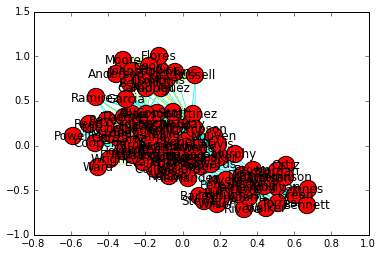

In [67]:
# Finally draw the graph
#plt.axis("off") # to make it look pretty
nx.draw_networkx(pacnet,width=weights,edge_color=weights)
nx.write_graphml(DG,"inventoryDD2.graphml")

The graphml files were then loaded to Gephi to visualize data better.<br>
There are 5 communities are clearly visible. 


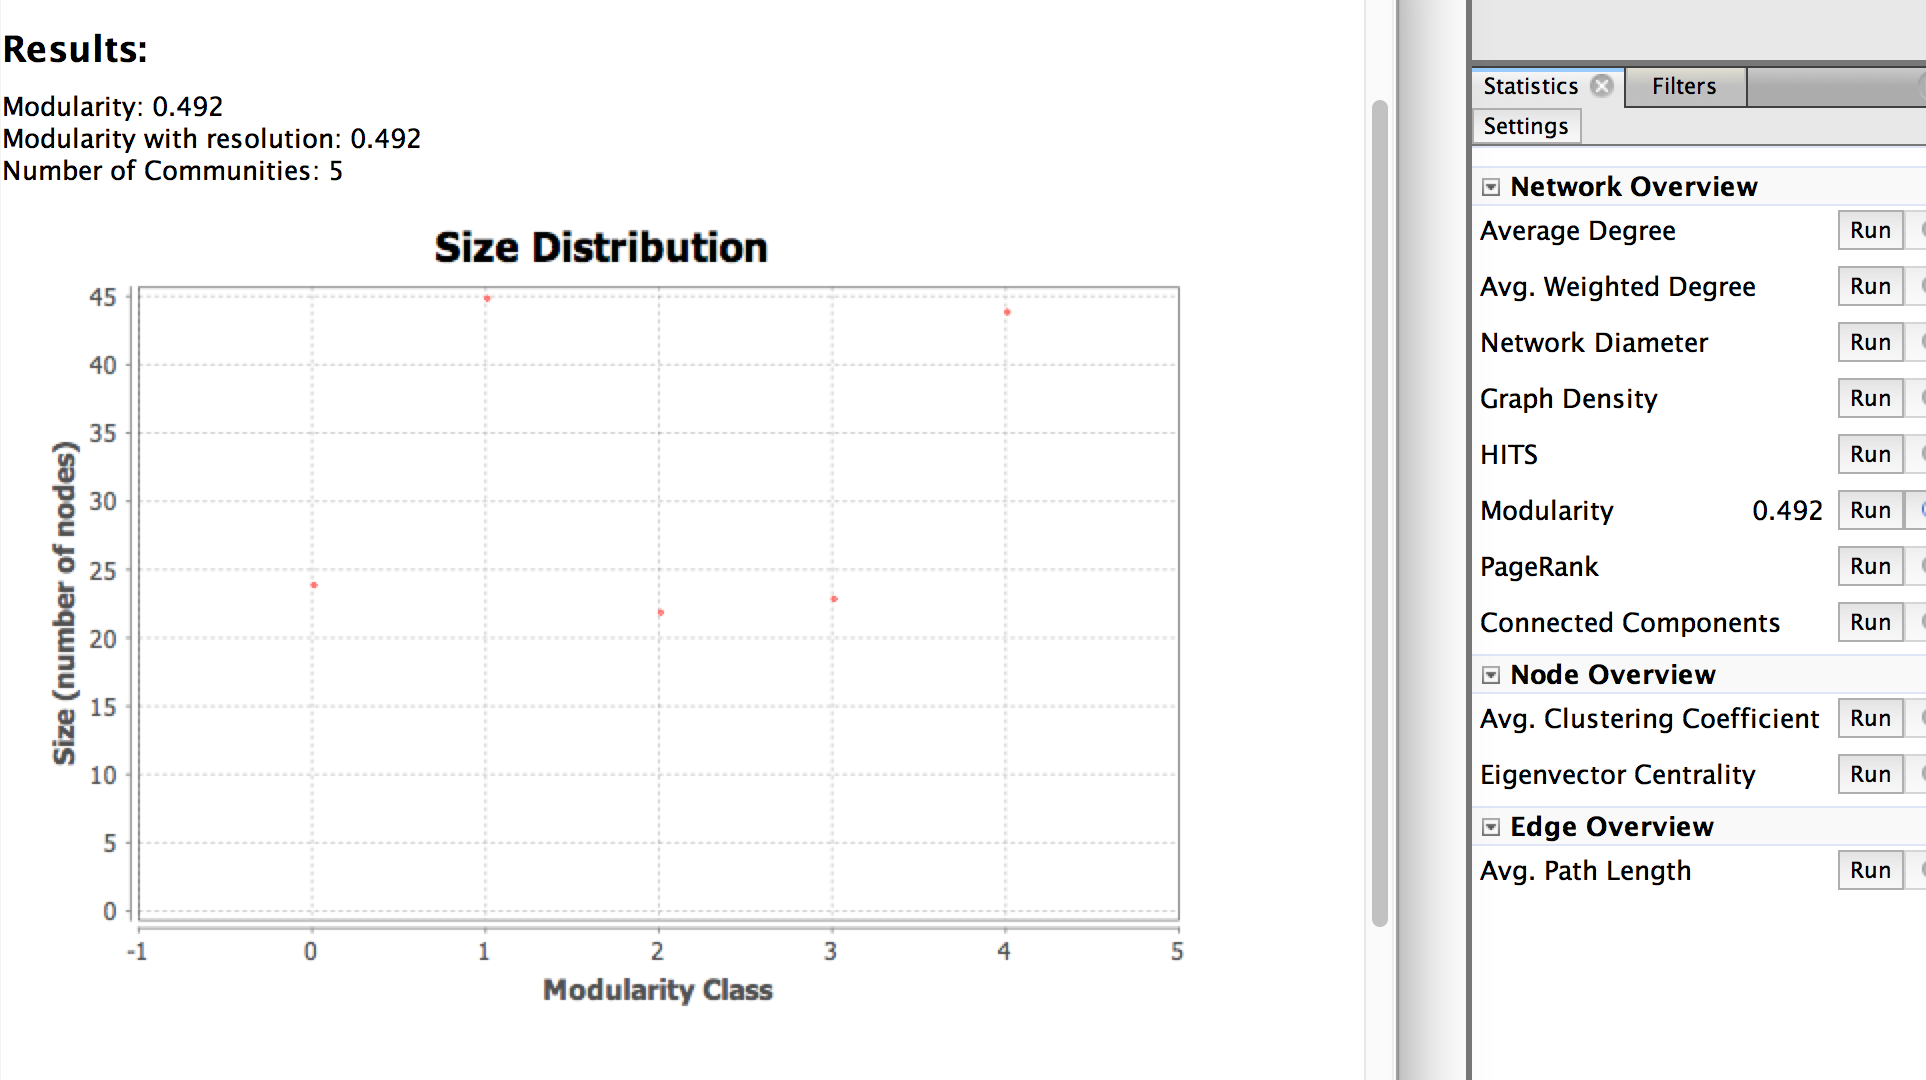

In [68]:
# just the graph
from IPython.display import Image
Image(filename='DModularityReport-2.png')

Once the Modularity class was chosen from Nodes section under Partition on the left screen on the Gephi screen, communities are clearly visible. We can see that there are nodes that are not connected to any nodes, either there are no takers or customers who never took part in any deals. <br>


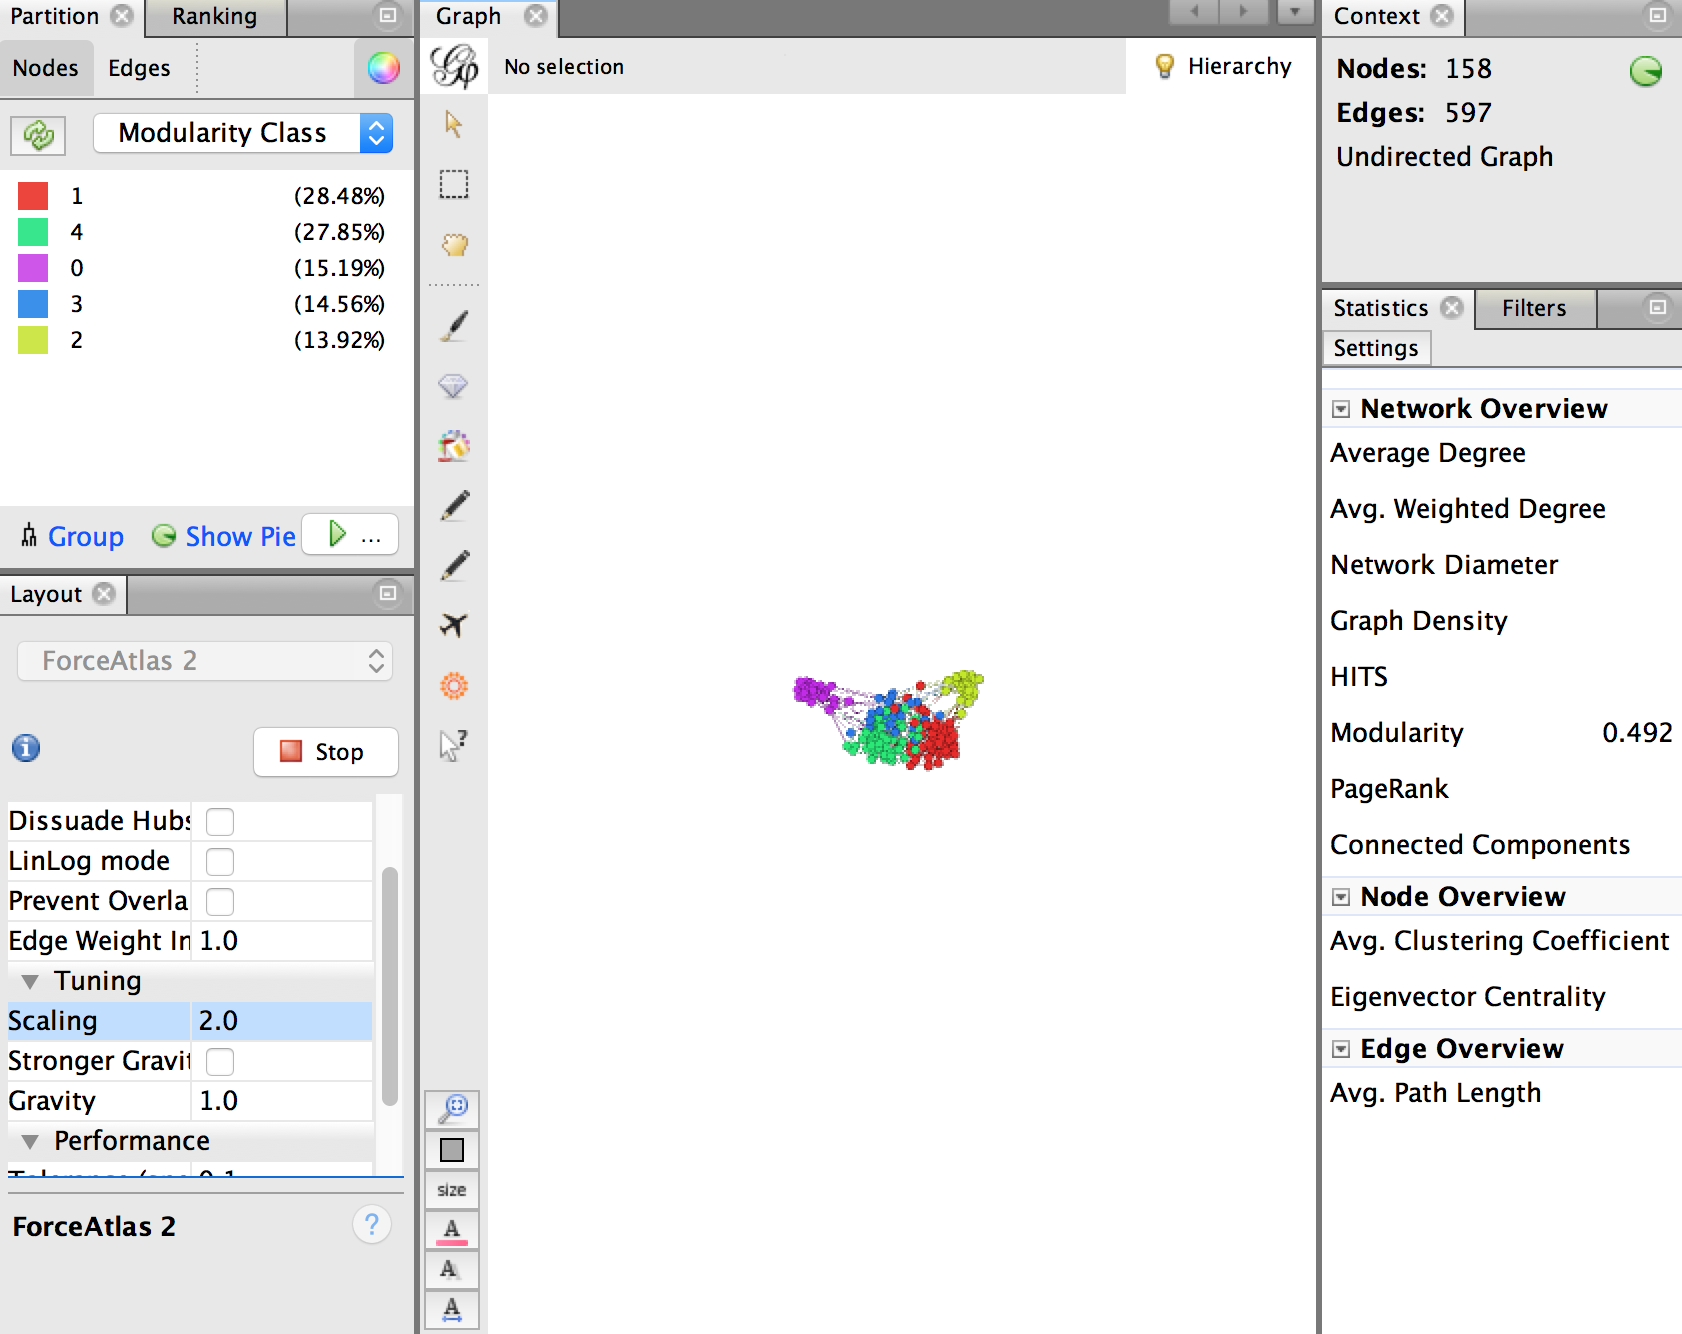

In [69]:
# just the graph
from IPython.display import Image
Image(filename='Dcommunities-2.png')

Choosing a 20.0 for Scaling on the left screen with a 'ForceAtlas2' layout, displays the graph as below. The five clusters of interconnected nodes are clearly visible in the enlarged graph. The ForceAtlas clayout colors each community in a unique color that helps to read data visually. Deals do  tend to clsuter around its own type of deals like Meth or Wee.

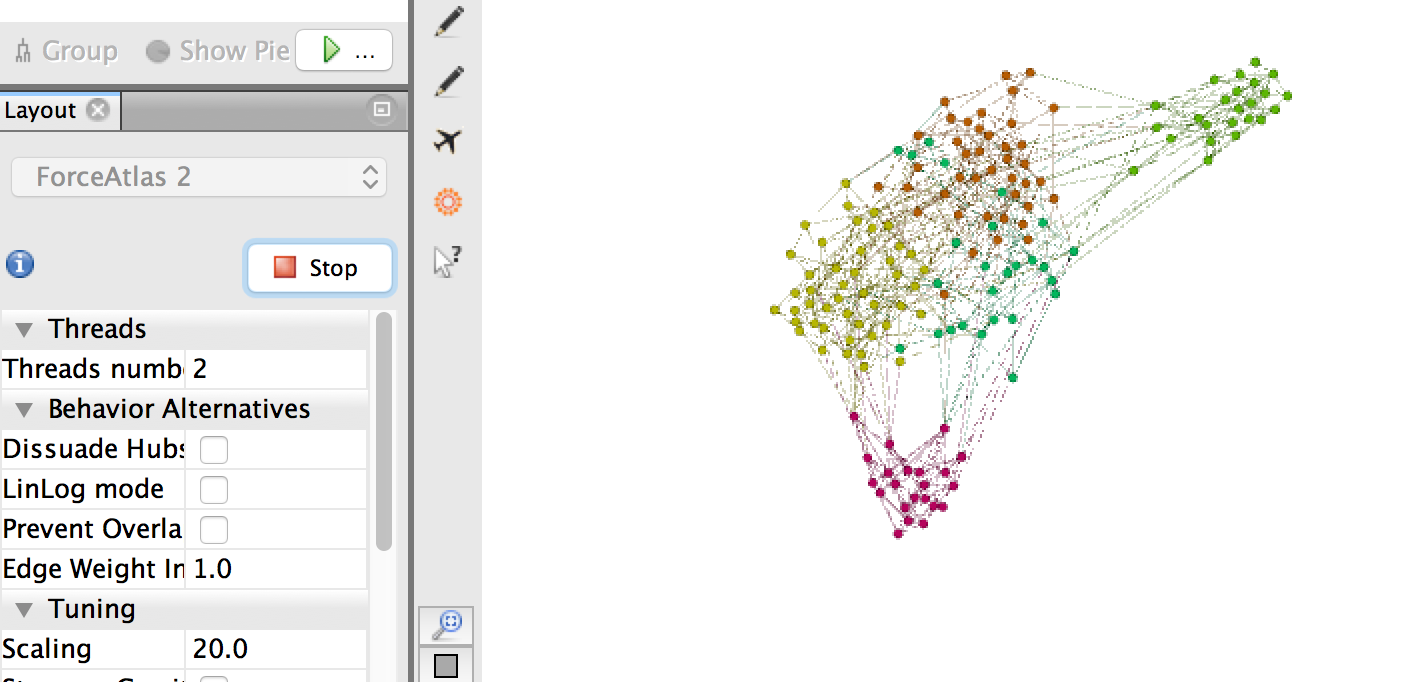

In [70]:
# just the graph
from IPython.display import Image
Image(filename='DScaled20.png')

Clicking on product for partition on the left ( while still under ForceAtlas2 Layout), and lciking on Ranking tab on top left, colors the nodes per product type. The size of the bubble indicates the weights.

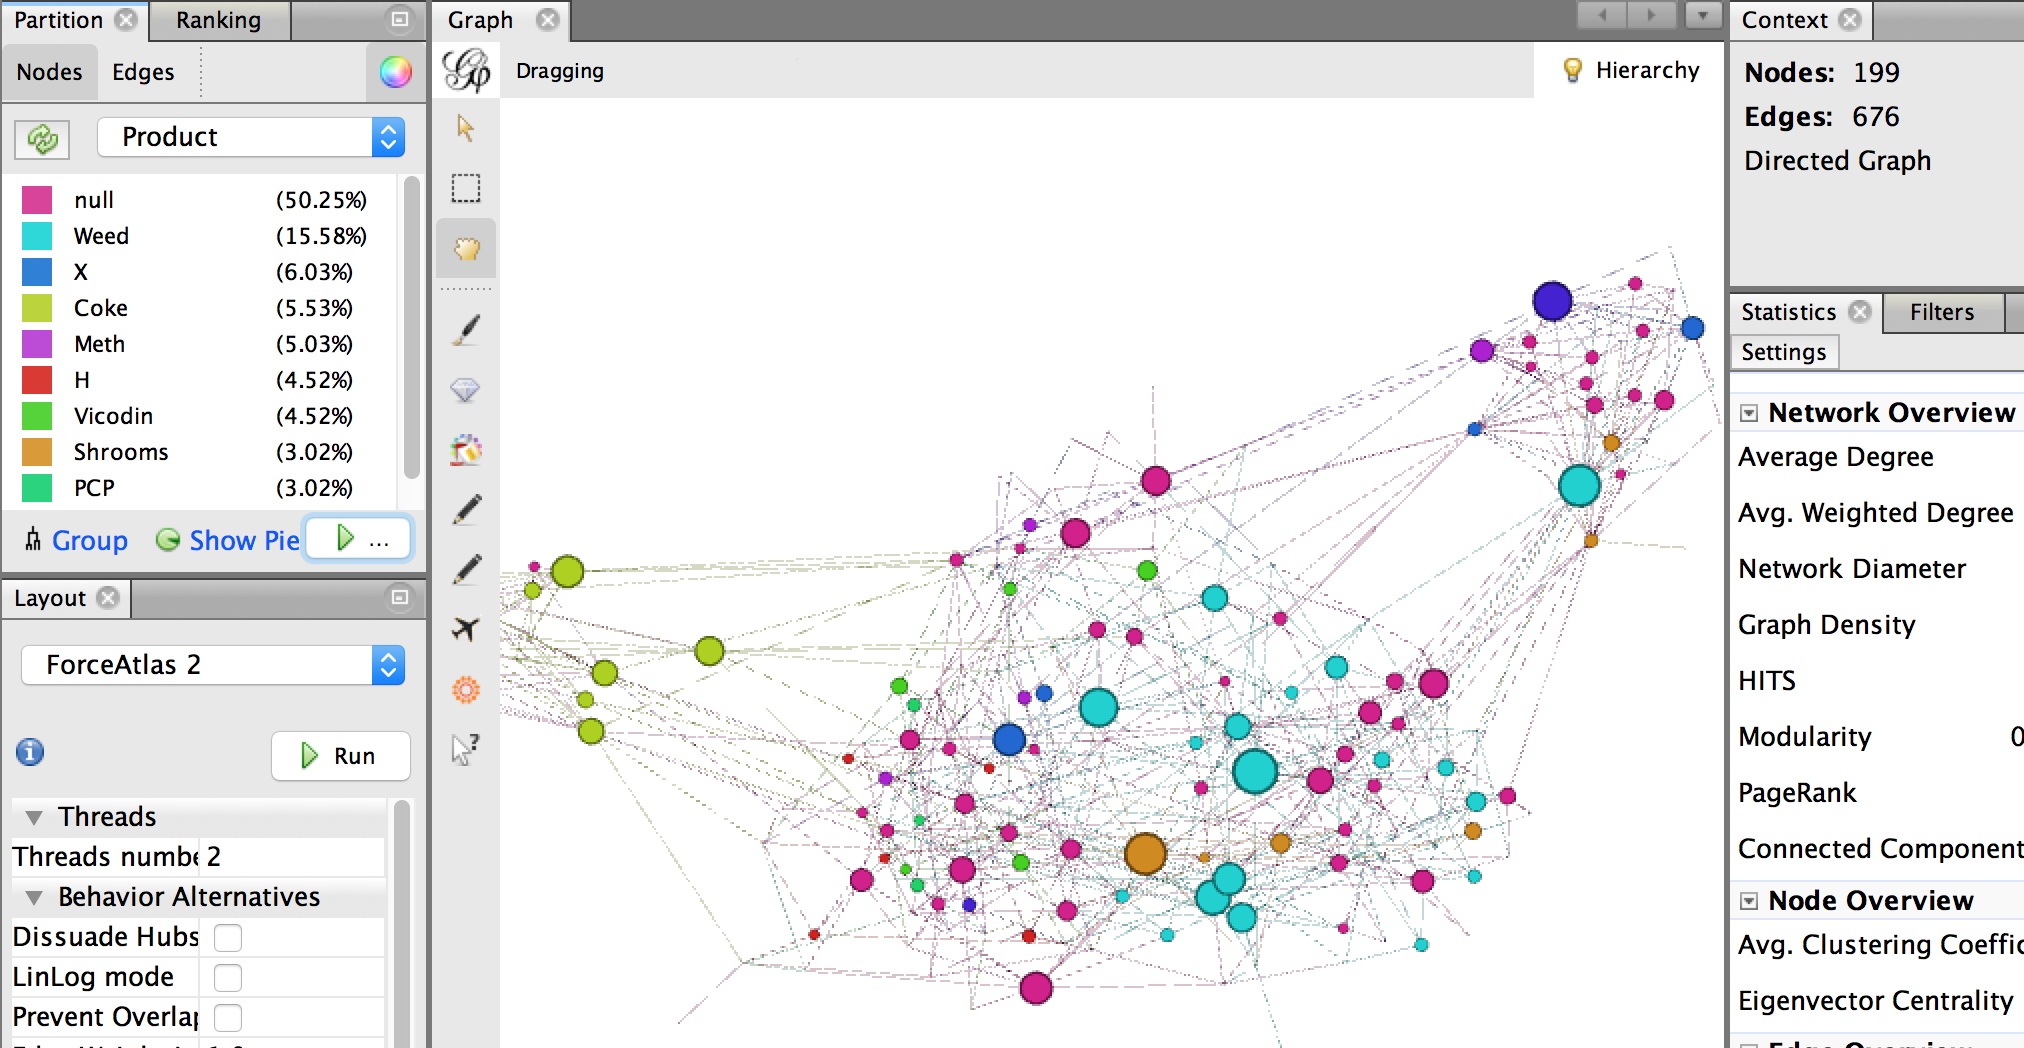

In [71]:
# just the graph
from IPython.display import Image
Image(filename='DNodesPerProduct.png')

We need the island method to analyze the above network.
A histogram will help in determining where to place the 'water level'. 
Histogram below shows that approximately 80% of values are weighted below 1.5, so we can safely trim them.


(array([ 1164.,     0.,     0.,   440.,     0.,   183.,     0.,    87.,
           28.,    19.]),
 array([ 0.        ,  0.19459101,  0.38918203,  0.58377304,  0.77836406,
         0.97295507,  1.16754609,  1.3621371 ,  1.55672812,  1.75131913,
         1.94591015]),
 <a list of 10 Patch objects>)

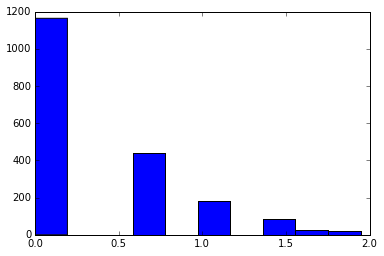

In [72]:

def trim_edges(DG,weight=1):
    g2=nx.Graph()
    for f, to, edata in DG.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2
plt.hist(weights)    

The weights histogram is logarithmic. 
We should compute the original weight = e^log_weight.     
Since most of the values (80%) are below 1.5, we will trim the edges to that weight readings.
And we are left with some edges which are plotted below.

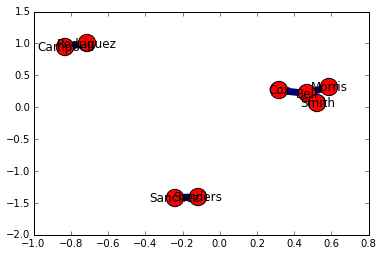

In [73]:
#print(weights)
pacnet_trim=trim_edges(pacnet,weight=math.exp(1.9))
#weight=math.exp(1.5)
#print("Test weight")
#print(weight)
#re-calculate the weights based on the new graph
weights=[edata['weight'] for f,t,edata in pacnet_trim.edges(data=True)]
#print("All weights")
#print(weights)
nx.draw_networkx(pacnet_trim,width=weights,edge_color=weights)
nx.write_graphml(DG,"inventoryDD3.graphml")


. 

Its very clear from the graph that certain customers are closely knit and they are in three separate groups.    
This graph literally provides a justification for collecting this data as it can be explained that if more often people attended the same event, more likely it is that they would interact and even develop relationship. Activities that involve a physical proximity enables ties to get stronger or even to happen. This analysis can be looked from a different angle. Maybe the customers who had a tie/close relationship buy the same kind of drugs, not the other way around.    
     
About the ease of data collection: Data for direct ties within the set is harder to collect, so data between two sets is collected, instead.       


  
As we can see, Graphs help in conversing with data visually. 


<b>Inference </b> It can be inferred that the interaction among customers of this social network is in distinct clusters is likely to occur in the near future. That is, it predicts the absence/presence of edges between two entities that are diverse in character(heterogeneous). So, there is heavy emphasis on the links than the nodes. 
From page 96 of the text book, we understand the concept of the duality of persons and groups. People’s ideas, attitudes and social connections are shaped by membership in groups and groups in turn are shaped by its members’ attitudes. So it’s inferred that the club members of the same club will tend to have similarities in their ideas and attitudes. The weight of the inferred links between co-members of a club are emphasized when relationships are continually accumulated( page 97). The 2-mode network analysis is based on the inference of an idea of homiphily ( page 98) that sharing interests or attributes (drugs in this case) form ties between people who are very different. 
